<a href="https://colab.research.google.com/github/md-kasim/tf/blob/master/ANN1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install tensorflow-gpu

In [0]:
!pip install mlxtend==0.17.0

In [0]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D, Dropout

In [0]:
print(tf.__version__)

2.0.0


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [0]:
from tensorflow.keras.datasets import cifar10

In [0]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [0]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [0]:
X_train.max()

255

In [0]:
X_train = X_train/255.0
X_test = X_test/255.0

In [0]:
X_train.shape, X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

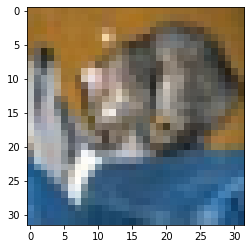

In [0]:
plt.imshow(X_test[0])

In [0]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

### Build CNN Model

In [0]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=[32, 32, 3]))
model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='valid'))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               1048704   
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [0]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

In [0]:
history = model.fit(X_train, y_train, batch_size=10, epochs=10, verbose=1, validation_data=(X_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 34s 671us/sample - loss: 1.3494 - sparse_categorical_accuracy: 0.5169 - val_loss: 1.0542 - val_sparse_categorical_accuracy: 0.6247
Epoch 2/10
50000/50000 [==============================] - 33s 655us/sample - loss: 1.0508 - sparse_categorical_accuracy: 0.6278 - val_loss: 0.9963 - val_sparse_categorical_accuracy: 0.6505
Epoch 3/10
50000/50000 [==============================] - 33s 665us/sample - loss: 0.9321 - sparse_categorical_accuracy: 0.6677 - val_loss: 0.9454 - val_sparse_categorical_accuracy: 0.6650
Epoch 4/10
50000/50000 [==============================] - 33s 652us/sample - loss: 0.8474 - sparse_categorical_accuracy: 0.7007 - val_loss: 0.9383 - val_sparse_categorical_accuracy: 0.6756
Epoch 5/10
50000/50000 [==============================] - 33s 651us/sample - loss: 0.7746 - sparse_categorical_accuracy: 0.7257 - val_loss: 0.9303 - val_sparse_categorical_accuracy: 0.6769
Epoch

In [0]:
history.history

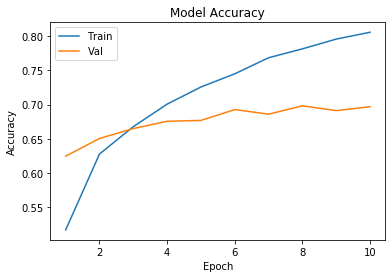

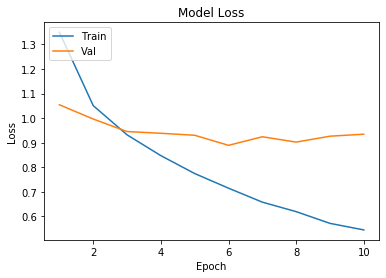

In [0]:
epoch_range = range(1,11)
plt.plot(epoch_range, history.history['sparse_categorical_accuracy'])
plt.plot(epoch_range, history.history['val_sparse_categorical_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

plt.plot(epoch_range, history.history['loss'])
plt.plot(epoch_range, history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [0]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [0]:
y_pred = model.predict_classes(X_test)

In [0]:
y_pred

array([3, 1, 8, ..., 2, 4, 7])

In [0]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [0]:
mat = confusion_matrix(y_test, y_pred)

In [0]:
mat

array([[732,  25,  55,  33,  19,   5,  13,  12,  54,  52],
       [ 15, 817,   4,  10,   5,   7,   7,   2,  15, 118],
       [ 61,   4, 541,  82, 111,  59,  89,  30,  13,  10],
       [ 24,  16,  70, 533,  72, 165,  73,  20,  11,  16],
       [ 18,   0,  63,  80, 667,  36,  80,  44,   8,   4],
       [ 13,   1,  51, 231,  54, 557,  46,  29,   6,  12],
       [  5,   2,  32,  64,  40,  14, 834,   3,   3,   3],
       [ 14,   3,  43,  47,  71,  78,  17, 704,   4,  19],
       [ 68,  58,  10,  16,  10,   7,   5,   3, 781,  42],
       [ 29,  92,   5,  16,   2,   3,  11,  13,  26, 803]])

(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f7a3f0b94e0>)

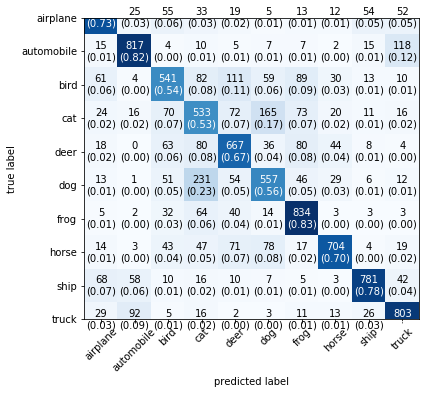

In [0]:
plot_confusion_matrix(mat, figsize=(6, 6), class_names=class_names, show_normed=True)